# Generate synthetic crab data

In [69]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from scipy.stats import poisson, binom

## Global user settings

In [2]:
N_MONTHS = 36
LAT1 = 37.02606
LAT2 = 37.1

LONG1 = -8.01873
LONG2 = -8.62

## Sneak peak to Original data

In [3]:
data_raw_path = os.path.join(os.getcwd(), '../data-raw')
os.listdir(data_raw_path)

['rf_w_q2.csv',
 'quadrats.xlsx',
 'rf_s_q2.csv',
 'Ria de Alvor.xlsx',
 'rf_s_q1.csv',
 'rf_w_q1.csv']

In [4]:
d1 = pd.read_csv(os.path.join(data_raw_path, 'rf_s_q1.csv'))
d2 = pd.read_csv(os.path.join(data_raw_path, 'rf_s_q2.csv'))

d3 = pd.read_csv(os.path.join(data_raw_path, 'rf_w_q1.csv'))
d4 = pd.read_csv(os.path.join(data_raw_path, 'rf_w_q2.csv'))

In [5]:
d1.head()

,cl,lcl,fw,species,longitude,is_gravid,rcl,stage,sex,id,cw,latitude
0,21,16,15,A. farensis,-8.01873,False,10,juvenile,?,1,27,37.02606
1,21,13,16,A. farensis,NaN,False,15,juvenile,?,2,27,NaN
2,15,9,10,A. farensis,NaN,True,5,juvenile,female,3,19,NaN
3,21,16,19,A. farensis,NaN,False,14,juvenile,male or female,4,26,NaN
4,19,8,14,A. farensis,NaN,False,7,juvenile,female,5,24,NaN


In [6]:
list(d1.stage.unique()), list(d2.stage.unique()), list(d1.is_gravid.unique()), list(d4.stage.unique())

(['juvenile', 'pre_puberty', 'sub_adult', 'adult'],
 ['juvenile', 'pre_puberty', 'sub_adult', 'adult'],
 [np.False_, np.True_],
 ['juvenile', 'pre_puberty', 'sub_adult', 'adult'])

## Dates
- I do not want random dates anymore

In [9]:
random_dates = [
    "2020-01-08", "2020-02-25", "2020-03-17", "2020-04-04", "2020-05-06", "2020-06-07",
    "2020-07-05", "2020-08-28", "2020-09-02", "2020-10-03", "2020-11-27", "2020-12-24",
    "2021-01-26", "2021-02-18", "2021-03-03", "2021-04-22", "2021-05-18", "2021-06-13",
    "2021-07-12", "2021-08-06", "2021-09-12", "2021-10-03", "2021-11-28", "2021-12-29",
    "2022-01-14", "2022-02-16", "2022-03-12", "2022-04-25", "2022-05-13", "2022-06-09",
    "2022-07-15", "2022-08-22", "2022-09-16", "2022-10-11", "2022-11-13", "2022-12-13"
]

In [10]:
# start_year = 2020
# months = pd.date_range(start=f'{start_year}-01-01', periods=N_MONTHS, freq='MS')  # Start of each month

# # Generate random day for each month
# random_dates = [
#     pd.Timestamp(year=dt.year, month=dt.month, day=np.random.randint(1, dt.days_in_month + 1))
#     for dt in months
# ]

# # Convert to pandas Series or DataFrame
# random_dates = pd.Series(random_dates, name="random_monthly_date")
# # random_dates

### Basis for the number of crabs for R Formosa

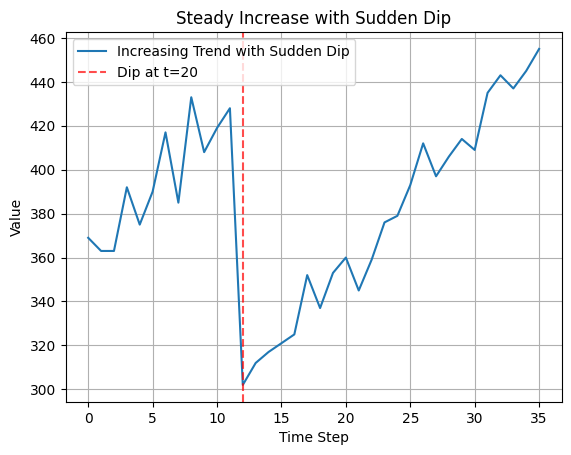

In [11]:
# Parameters
n_points = N_MONTHS
slope = 0.2
dip_time = 12
dip_magnitude = -120  # Negative for a dip
noise_std = 10.2

# Time vector
t = np.arange(n_points)

# Linear increasing trend
trend = slope * t + 12

# Sudden dip
dip = np.zeros(n_points)
dip[dip_time:] = dip_magnitude

# Add some Gaussian noise
noise = np.random.normal(0, noise_std, size=n_points)

# Final series
n_crabs1 = 30 * trend + noise + dip
n_crabs1 = n_crabs1.astype(int)

# Plot
plt.plot(t, n_crabs1, label='Increasing Trend with Sudden Dip')
plt.axvline(dip_time, color='red', linestyle='--', alpha=0.7, label='Dip at t=20')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.title('Steady Increase with Sudden Dip')
plt.show()

### Basis for number of crabs for Ria Alvor

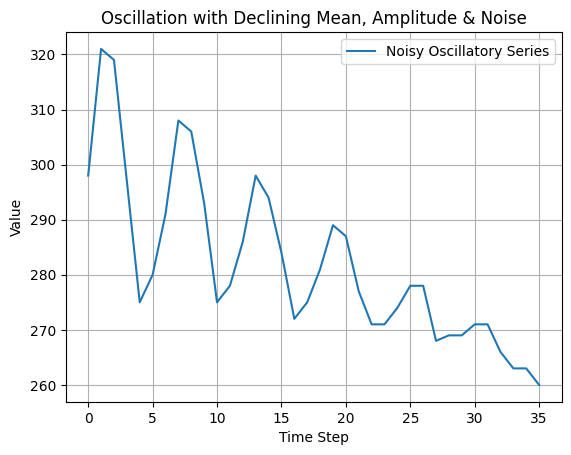

In [12]:
# Parameters
n_points = N_MONTHS
period = 6
initial_amplitude = 25
initial_mean = 300
decline_rate = 1.0
amplitude_decay_rate = 0.06
noise_std = 2.0

# Time vector
t = np.arange(n_points)

# Declining mean
mean_trend = initial_mean - decline_rate * t

# Changing amplitude over time
amplitude = initial_amplitude * np.exp(-amplitude_decay_rate * t)

# Oscillatory component with variable amplitude
oscillation = amplitude * np.sin(2 * np.pi * t / period)

# Add noise
noise = np.random.normal(0, noise_std, size=n_points)

# Final series
n_crabs2 = mean_trend + oscillation + noise
n_crabs2 = n_crabs2.astype(int)

# Plot
plt.plot(t, n_crabs2, label='Noisy Oscillatory Series')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.title('Oscillation with Declining Mean, Amplitude & Noise')
plt.show()

## Temp
- not used ATM

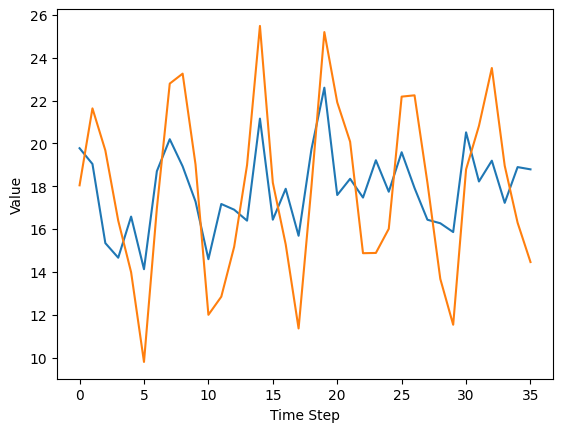

In [32]:
# Parameters
n_points = N_MONTHS
period = 6
amplitude1 = 2
amplitude2 = 5
initial_mean = 18
noise_std = 1.5

# Time vector
t = np.arange(n_points)

# Oscillatory component with variable amplitude
oscillation2 = amplitude2 * np.sin(2 * np.pi * t / period)
oscillation1 = amplitude1 * np.sin(2 * np.pi * t / period + np.pi / 3)  # Phase shift

# Add noise
noise = np.random.normal(0, noise_std, size=n_points)

# Final series
t1 = initial_mean + oscillation1 + noise
t2 = initial_mean + oscillation2 + noise

# Plot
plt.plot(t, t1, label='Noisy Oscillatory Series')
plt.plot(t, t2, label='Noisy Oscillatory Series')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.show()

In [13]:
cluster1_movement = [
    "Scuttling swiftly over rocky terrain.",
    "Slowly navigating around seagrass beds.",
    "Side-stepping along sandy coastal floor.",
    "Darting away in response to sudden shadow.",
    "Swimming briefly to avoid disturbance.",
    "Creeping under the cover of seagrass.",
    "Traversing algae-slick rock surfaces.",
    "Clambering up submerged tree trunks.",
    "Scaling steep rock faces near shore.",
    "Swiftly dashing across exposed sand.",
    "Advancing toward bait in water.",
    "Progressing cautiously through new area.",
    "Group migration across shallow seabed.",
    "Frequent pausing while exploring.",
    "Gradual movement in cold conditions."
]

cluster2_feeding = [
    "Grazing on mollusks among debris.",
    "Picking algae carefully off rock faces.",
    "Filtering detritus from shallow bottom.",
    "Harvesting food beneath floating debris.",
    "Foraging through tangled seagrass roots.",
    "Scavenging at the edge of tidal pools.",
    "Consuming algae scraped from barnacles.",
    "Feeding on small crustaceans in crevices.",
    "Sifting through sediment for scraps.",
    "Collecting biofilm from sunken wood.",
    "Rapid clawing during feeding bouts.",
    "Nibbling detritus off seabed patches.",
    "Searching tidal pools for nutrients.",
    "Feeding on decaying matter among rocks."
]

cluster3_social = [
    "Waving claw in signal to another crab.",
    "Engaging in antennae-to-antennae contact.",
    "Claw snapping in aggressive encounter.",
    "Displaying territorial behavior against intruder.",
    "Performing dominance display by body lifting.",
    "Claw shaking post-contact gesture.",
    "Vibrating antennae in flowing current.",
    "Interaction with nearby hermit crab.",
    "Claw snapping in diver confrontation.",
    "Rhythmic waving as social cue.",
    "Brief social contact with fellow crabs.",
    "Mating ritual involving antennae brushing.",
    "Guarding eggs beneath body flap.",
    "Approaching small fish with curiosity."
]

cluster4_shelter = [
    "Retreating quickly into hidden burrow.",
    "Burrowing into soft, sandy sediment.",
    "Sheltering under broken shell piece.",
    "Camouflaging with nearby mud.",
    "Hiding beneath overhanging rock.",
    "Resting in shaded crevice along cliff.",
    "Staying half-submerged in loose sand.",
    "Taking cover beneath seagrass leaves.",
    "Concealing self beneath floating matter.",
    "Stationary, blending into rocky backdrop.",
    "Entering burrow after disturbance.",
    "Lying still to avoid detection.",
    "Peering out cautiously from cover."
]

cluster5_defensive = [
    "Adopting threatening stance when approached.",
    "Escaping from pursuing predator silhouette.",
    "Engaging in struggle with seaweed entanglement.",
    "Inspecting remains of another crab.",
    "Color change during molting stress.",
    "Retreating swiftly from perceived danger.",
    "Guarding hole in substrate from intruders.",
    "Resisting aggressive fish encounter.",
    "Defensive claw movement in water.",
    "Reacting to sudden changes in temperature.",
    "Emerging slowly after perceived threat.",
    "Protecting territory in confined space."
]

texts = cluster1_movement + cluster2_feeding + cluster3_social + cluster4_shelter + cluster5_defensive

associated_species = [
    "Sea Star",
    "Hermit Crab",
    "Small Fish",
    "Snail",
    "Shrimp",
    "Barnacle",
    "Sea Anemone",
    "Sea Urchin",
    "Algae",
    "Polychaete Worm",
    "Mussel",
    "Coral Fragment",
    "Jellyfish",
    "Sea Sponge",
    "Crab (Other Species)",
]

## Generate crab by crab

In [15]:
def random_associated_species(species_list, min_items=1, max_items=5):
    n = random.randint(min_items, max_items)
    return random.sample(species_list, n)

def generate_noisy_poisson(mu, cutoff=5, mult=6):
    """    Generate a noisy sample from a Poisson distribution, apply a linear transformation,
    and filter out values below a specified cutoff.
    """
    samples = poisson.rvs(mu=mu, size=1000)
    noise = np.random.normal(loc=0, scale=1.0, size=samples.shape)
    noisy_samples = mult*(samples + noise)
    # cut values less than X
    noisy_samples = noisy_samples[noisy_samples >= cutoff].astype(int)
    return noisy_samples


def generate_noisy_normal(mu, sigma=1.0):
    """
    Generate a sample from a normal distribution, apply a linear transformation,
    and filter out values below a specified cutoff.

    Parameters:
        mu (float): Mean of the normal distribution.
        sigma (float): Standard deviation of the normal distribution.
        cutoff (float): Minimum value threshold after transformation.

    Returns:
        np.ndarray: Filtered and scaled samples as integers.
    """
    samples = np.random.normal(loc=mu, scale=sigma, size=1000)
    # samples = samples[samples <= cutoff].astype(int)
    return samples.astype(int)

In [42]:
species = ['A farensis', 'A. Farensis', 'U. olhanensis', 'u. olhanen.', 'Ucides alvorensis']
lst_sex = ['female', 'male', 'male or female', ' ', '-', np.nan, 'N/R']
lst_stage = ['juvenile', 'pre_puberty', 'sub_adult', 'adult']
lst_stage2 = ['j', 'p', 's', 'a']

### R Formosa

In [43]:
# different probabilities for each species
psex_far=[0.45, 0.47, 0.02, 0.01, 0.02, 0.01, 0.02]
psex_olh=[0.48, 0.47, 0.01, 0.01, 0.01, 0.01, 0.01]
psex_alv=[0.3, 0.3, 0.2, 0.05, 0.05, 0.05, 0.05]

In [44]:
mus_formosa = np.linspace(2, 5, N_MONTHS)
cutoffs_formosa = np.linspace(4, 7, N_MONTHS)

# mus_formosa_fw = np.linspace(50, 20, N_MONTHS)
# cutoffs_formosa_fw = np.linspace(5, 10, N_MONTHS)

In [45]:
from tqdm import tqdm
from datetime import datetime, date

In [46]:
data = []
for idx in tqdm(range(N_MONTHS)):
# for idx in range(2):

    date = datetime.strptime(random_dates[idx], "%Y-%m-%d")  # Use the first random date for all crabs
    count = 0
    df = pd.DataFrame(columns=['species', 'sex', 'stage'])

    pstage_far = [0.15 - idx * 0.001, 0.2, 0.3 + idx * 0.001, 0.4 - idx * 0.002]
    total = sum(pstage_far)
    pstage_far = [x / total for x in pstage_far]  # Normalize to sum to 1

    pstage_olh = [0.15 - idx * 0.002, 0.2, 0.3 - idx * 0.001, 0.4 + idx * 0.002]
    total = sum(pstage_olh)
    pstage_olh = [x / total for x in pstage_olh]  # Normalize to sum to 1

    pstage_alv = [0.25 - idx * 0.001, 0.3, 0.25 + idx * 0.001, 0.25]
    total = sum(pstage_alv)
    pstage_alv = [x / total for x in pstage_alv]  # Normalize to sum to 1

    # make gravid crabs probabilistic
    p_gravid = [0.3 * (1 + 0.01 * idx), 0.7 * (1 - 0.01 * idx)]
    total = sum(p_gravid)
    p_gravid = [x / total for x in p_gravid]  # Normalize to sum to 1


    # numerical cols
    cl = generate_noisy_poisson(mus_formosa[idx], cutoff=int(cutoffs_formosa[idx]))
    # fw = generate_noisy_normal(mus_formosa_fw[idx], sigma=1.0)


    # Parameters
    n_trials = 18      # number of trials per sample
    p_success = 0.45   # probability of success
    n_samples = 1000   # number of samples to generate

    # Generate samples

    dep = binom.rvs(n=n_trials, p=p_success, size=n_crabs1[idx])

    # quartiles
    dep_quartiles = np.percentile(dep, [20, 50, 65, 85])
    # map quartiles to factors in dictionary
    quartile_factors = {
        'Q1': 0.9,
        'Q2': 1.0,
        'Q3': 1.2,
        'Q4': 1.5
    }

    for i in range(n_crabs1[idx]):
        crab_dict = {
            'species': np.random.choice(species, p=[0.2, 0.16, 0.25, 0.31, 0.08]),
        }
        if crab_dict['species'][0] == 'A':
            crab_dict['sex'] = np.random.choice(lst_sex, p=psex_far)
            crab_dict['stage'] = np.random.choice(lst_stage, p=pstage_far)

        elif crab_dict['species'][:2] == 'Uc':
            crab_dict['sex'] = np.random.choice(lst_sex, p=psex_alv)
            crab_dict['stage'] = np.random.choice(lst_stage, p=pstage_alv)
        else:
            crab_dict['sex'] = np.random.choice(lst_sex, p=psex_olh)
            crab_dict['stage'] = np.random.choice(lst_stage, p=pstage_olh)

        if crab_dict['sex'] == 'female':
            crab_dict['is_gravid'] = np.random.choice([True, False], p=p_gravid)
        else:
            if i % 10 == 0:  # every 10th crab is gravid
                crab_dict['is_gravid'] = True

        crab_dict['behaviour'] = np.random.choice(texts, replace=True)
        crab_dict['associated_species'] = random_associated_species(associated_species)
        crab_dict['depth [m]'] = dep[i]

        factor = quartile_factors['Q1'] if dep[i] <= dep_quartiles[0] else \
            quartile_factors['Q2'] if dep[i] <= dep_quartiles[1] else \
            quartile_factors['Q3'] if dep[i] <= dep_quartiles[2] else \
            quartile_factors['Q4'] if dep[i] <= dep_quartiles[3] else 1.0

        # pick from quartile based on the stage
        if crab_dict['stage'] == 'juvenile':
            crab_dict['cl [mm]'] = cl[i] * 0.5  # Juveniles are smaller
            # make 'cw correlated with 'cl' for juveniles
            crab_dict['cw [mm]'] = crab_dict['cl [mm]'] * np.random.uniform(0.6, 1.4)  # Randomly vary the correlation

        elif crab_dict['stage'] == 'pre_puberty':
            crab_dict['cl [mm]'] = cl[i] * 0.75  # Pre-puberty crabs are medium-sized
            crab_dict['cw [mm]'] = crab_dict['cl [mm]'] * np.random.uniform(0.7, 1.3)  # Randomly vary the correlation

        elif crab_dict['stage'] == 'sub_adult':
            crab_dict['cl [mm]'] = cl[i] * 1.25  # Sub-adults are larger
            crab_dict['cw [mm]'] = crab_dict['cl [mm]'] * np.random.uniform(0.8, 1.2)  # Randomly vary the correlation

        else:
            crab_dict['cl [mm]'] = cl[i] * 1.5  # Adults are the largest
            crab_dict['cw [mm]'] = crab_dict['cl [mm]'] * np.random.uniform(0.9, 1.1)  # Randomly vary the correlation

        # assymetries between females and males, in size and lcl, rcl
        if crab_dict['sex'] == 'female':
            # multiply by a factor to simulate smaller size
            crab_dict['cl [mm]'] *= np.random.uniform(0.7, 0.9)
            crab_dict['cw [mm]'] *= np.random.uniform(0.8, 0.85)

            crab_dict['lcl [mm]'] = crab_dict['cw [mm]'] * np.random.uniform(0.6, 1.0)
            crab_dict['rcl [mm]'] = crab_dict['cw [mm]'] * np.random.uniform(0.7, 0.9)

        elif crab_dict['sex'] == 'male':
            if np.random.rand() < 0.35: # prevalence of big rlc
                crab_dict['lcl [mm]'] = crab_dict['cw [mm]']**2 * np.random.uniform(0.5, 0.8)
                crab_dict['rcl [mm]'] = crab_dict['cw [mm]'] * np.random.uniform(0.7, 0.9)
            else:
                crab_dict['lcl [mm]'] = crab_dict['cw [mm]'] * np.random.uniform(0.7, 0.9)
                crab_dict['rcl [mm]'] = crab_dict['cw [mm]']**2 * np.random.uniform(0.5, 0.8)
        else:  # these are unidentified crabs, so I make them more similar, but maybe identifiable through ML
            if np.random.rand() < 0.5: # more male like crab
                crab_dict['lcl [mm]'] = crab_dict['cw [mm]']**1.8 * np.random.uniform(0.4, 0.6)
                crab_dict['rcl [mm]'] = crab_dict['cw [mm]'] * np.random.uniform(0.7, 0.9)
            else: # more female like crab, this is supposed to be not so clearcut
                crab_dict['cl [mm]'] *= np.random.uniform(0.8, 1.0)         # bigger factor than above
                crab_dict['cw [mm]'] *= np.random.uniform(0.87, 0.95)       # bigger factor than above

                crab_dict['lcl [mm]'] = crab_dict['cw [mm]'] * np.random.uniform(0.7, 0.9)
                crab_dict['rcl [mm]'] = crab_dict['cw [mm]'] * np.random.uniform(0.9, 1.1)

        # simplifying the data by removing fw
        # crab_dict['fw [mm]'] = fw[i]
        # crab_dict['date'] = date
        crab_dict['latitude'] = None
        crab_dict['longitude'] = None

        crab_dict['id'] = count
        count += 1
        df = pd.concat([df, pd.DataFrame([crab_dict])], ignore_index=True)

    # I append here to a list for direct concat, for later analysis below
    df1 = df.copy()
    df1['date'] = date
    data.append(df1)

    df['id'] = df['id'].astype(int)
    # introduce bad values
    for _ in range(3):
        ii = random.randint(0, len(df) - 1)
        df.iloc[ii, df.columns.get_loc('cw [mm]')] = -999
    df.loc[0, 'latitude'] = LAT1
    df.loc[0, 'longitude'] = LONG1
    df.reset_index(inplace=True, drop=True)

    filename = f'{str(date.date())}_rf.csv'
    df.to_csv(filename)#, index=False)

rfdata = pd.concat(data, ignore_index=True)

100%|██████████| 36/36 [00:18<00:00,  1.98it/s]


In [47]:
rfdata

,species,sex,stage,is_gravid,behaviour,associated_species,depth [m],cl [mm],cw [mm],lcl [mm],rcl [mm],latitude,longitude,id,date
0,u. olhanen.,male or female,adult,True,Clambering up submerged tree trunks.,"[Mussel, Snail, Sea Urchin]",7.0,14.531554,15.508651,12.288342,15.368501,None,None,0.0,2020-01-08
1,u. olhanen.,male,pre_puberty,NaN,Side-stepping along sandy coastal floor.,"[Sea Star, Algae, Snail]",8.0,28.500000,25.017771,21.212802,327.870706,None,None,1.0,2020-01-08
2,U. olhanensis,,adult,NaN,Feeding on decaying matter among rocks.,"[Barnacle, Sea Anemone, Sea Star]",10.0,18.831504,18.624938,15.156240,19.352522,None,None,2.0,2020-01-08
3,A farensis,female,adult,False,Progressing cautiously through new area.,[Barnacle],5.0,11.853591,13.747975,13.211658,10.104281,None,None,3.0,2020-01-08
4,U. olhanensis,male,pre_puberty,NaN,Darting away in response to sudden shadow.,"[Small Fish, Algae]",11.0,15.000000,10.742135,7.844267,59.756464,None,None,4.0,2020-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13821,U. olhanensis,male,pre_puberty,True,Peering out cautiously from cover.,"[Mussel, Coral Fragment, Polychaete Worm]",8.0,13.500000,12.192383,10.018795,95.409963,None,None,450.0,2022-12-13
13822,U. olhanensis,female,adult,True,Engaging in struggle with seaweed entanglement.,[Small Fish],11.0,61.747712,70.751629,64.736516,59.926999,None,None,451.0,2022-12-13
13823,U. olhanensis,female,adult,False,Foraging through tangled seagrass roots.,"[Sea Sponge, Snail, Barnacle, Coral Fragment]",7.0,38.463366,37.858232,24.156650,27.989184,None,None,452.0,2022-12-13
13824,U. olhanensis,female,sub_adult,True,Darting away in response to sudden shadow.,"[Small Fish, Sea Urchin]",7.0,39.648819,43.635356,26.669043,33.171546,None,None,453.0,2022-12-13


## Ria Alvor

In [48]:
# different probabilities for each species
psex_far=[0.43, 0.49, 0.02, 0.01, 0.02, 0.01, 0.02]
psex_olh=[0.47, 0.48, 0.01, 0.01, 0.01, 0.01, 0.01]
psex_alv=[0.35, 0.35, 0.1, 0.05, 0.05, 0.05, 0.05]

In [49]:
mus_formosa = np.linspace(3, 6, N_MONTHS)
cutoffs_formosa = np.linspace(4, 7, N_MONTHS)

# mus_formosa_fw = np.linspace(40, 20, N_MONTHS)
# cutoffs_formosa_fw = np.linspace(5, 10, N_MONTHS)

In [50]:
data = []
for idx in tqdm(range(N_MONTHS)):
# for idx in range(2):

    date = datetime.strptime(random_dates[idx], "%Y-%m-%d")  # Use the first random date for all crabs
    # extract season from date
    season = date.month
    if season in [12, 1, 2]:
        season = 'winter'
    elif season in [3, 4, 5]:
        season = 'spring'
    elif season in [6, 7, 8]:
        season = 'summer'

    count = 0
    df = pd.DataFrame(columns=['species_name', 'sex', 'stage'])

    pstage_far=[0.17 + idx*0.001, 0.18, 0.33 - idx*0.001, 0.37 + idx*0.002]
    total = sum(pstage_far)
    pstage_far = [x / total for x in pstage_far]  # Normalize to sum to 1

    pstage_olh=[0.17 - idx*0.002, 0.18, 0.33 - idx*0.001, 0.37 - idx*0.002]
    total = sum(pstage_olh)
    pstage_olh = [x / total for x in pstage_olh]  # Normalize to sum to 1

    pstage_alv=[0.27 + idx*0.001, 0.28, 0.28 + idx*0.001, 0.22]
    total = sum(pstage_alv)
    pstage_alv = [x / total for x in pstage_alv]  # Normalize to sum to 1

    # make gravid crabs probabilistic
    p_gravid = [0.2 * (1 - 0.01 * idx), 0.8 * (1 + 0.01 * idx)]
    if season == 'winter':
        p_gravid[0] *= 0.8  # Reduce probability of gravid females in winter
        p_gravid[1] *= 1.2  # Increase probability of non-gravid females in winter
    if season == 'spring':
        p_gravid[0] *= 1.2  # Increase probability of gravid females in spring
    elif season == 'summer':
        p_gravid[0] *= 1.1  # Slightly increase probability of gravid females in summer
    elif season == 'autumn':
        p_gravid[0] *= 0.9  # Slightly decrease probability of gravid females in autumn
    total = sum(p_gravid)
    p_gravid = [x / total for x in p_gravid]  # Normalize to sum to 1


    # numerical cols
    cl = generate_noisy_poisson(mus_formosa[idx], cutoff=int(cutoffs_formosa[idx]))
    # fw = generate_noisy_normal(mus_formosa_fw[idx], sigma=1.0)


    # Parameters
    n_trials = 18      # number of trials per sample
    p_success = 0.35   # probability of success
    n_samples = 1000   # number of samples to generate

    # Generate samples

    dep = binom.rvs(n=n_trials, p=p_success, size=n_crabs1[idx])

    # quartiles
    dep_quartiles = np.percentile(dep, [20, 50, 65, 85])
    # map quartiles to factors in dictionary
    quartile_factors = {
        'Q1': 0.9,
        'Q2': 1.0,
        'Q3': 1.2,
        'Q4': 1.5
    }

    for i in range(n_crabs2[idx]):
        crab_dict = {
            'species_name': np.random.choice(species, p=[0.22, 0.18, 0.23, 0.29, 0.08]),
        }
        if crab_dict['species_name'][0] == 'A':
            crab_dict['sex'] = np.random.choice(lst_sex, p=psex_far)
            crab_dict['stage'] = np.random.choice(lst_stage2, p=pstage_far)

        elif crab_dict['species_name'][:2] == 'Uc':
            crab_dict['sex'] = np.random.choice(lst_sex, p=psex_alv)
            crab_dict['stage'] = np.random.choice(lst_stage2, p=pstage_alv)
        else:
            crab_dict['sex'] = np.random.choice(lst_sex, p=psex_olh)
            crab_dict['stage'] = np.random.choice(lst_stage2, p=pstage_olh)

        if crab_dict['sex'] == 'female':
            crab_dict['is_gravid?'] = np.random.choice([True, False], p=p_gravid)
        else:
            if i % 10 == 0:  # every 10th crab is gravid
                crab_dict['is_gravid?'] = True

        crab_dict['behavior'] = np.random.choice(texts, replace=True)
        crab_dict['associated_species'] = random_associated_species(associated_species)
        crab_dict['depth [m]'] = dep[i]

        factor = quartile_factors['Q1'] if dep[i] <= dep_quartiles[0] else \
            quartile_factors['Q2'] if dep[i] <= dep_quartiles[1] else \
            quartile_factors['Q3'] if dep[i] <= dep_quartiles[2] else \
            quartile_factors['Q4'] if dep[i] <= dep_quartiles[3] else 1.0

        # pick from quartily based on the stage
        if crab_dict['stage'] == 'j':
            crab_dict['cl [cm]'] = cl[i] * 0.5  # Juveniles are smaller
            # make 'cw correlated with 'cl' for juveniles
            crab_dict['cw [cm]'] = crab_dict['cl [cm]'] * np.random.uniform(0.6, 1.4)  # Randomly vary the correlation

        elif crab_dict['stage'] == 'p':
            crab_dict['cl [cm]'] = cl[i] * 0.75  # Pre-puberty crabs are medium-sized
            crab_dict['cw [cm]'] = crab_dict['cl [cm]'] * np.random.uniform(0.7, 1.3)  # Randomly vary the correlation

        elif crab_dict['stage'] == 's':
            crab_dict['cl [cm]'] = cl[i] * 1.25  # Sub-adults are larger
            crab_dict['cw [cm]'] = crab_dict['cl [cm]'] * np.random.uniform(0.8, 1.2)  # Randomly vary the correlation

        else:
            crab_dict['cl [cm]'] = cl[i] * 1.5  # Adults are the largest
            crab_dict['cw [cm]'] = crab_dict['cl [cm]'] * np.random.uniform(0.9, 1.1)  # Randomly vary the correlation

        # assymetries between females and males, in size and lcl, rcl
        if crab_dict['sex'] == 'female':
            # multiply by a factor to simulate smaller size
            crab_dict['cl [cm]'] *= np.random.uniform(0.7, 0.9)
            crab_dict['cw [cm]'] *= np.random.uniform(0.8, 0.85)

            crab_dict['lcl [cm]'] = crab_dict['cw [cm]'] * np.random.uniform(0.6, 0.8)
            crab_dict['rcl [cm]'] = crab_dict['cw [cm]'] * np.random.uniform(0.8, 0.9)

        elif crab_dict['sex'] == 'male':
            if np.random.rand() < 0.4: # prevalence of big rlc
                crab_dict['lcl [cm]'] = crab_dict['cw [cm]']**1.7 * np.random.uniform(0.6, 0.8)
                crab_dict['rcl [cm]'] = crab_dict['cw [cm]'] * np.random.uniform(0.7, 0.9)
            else:
                crab_dict['lcl [cm]'] = crab_dict['cw [cm]'] * np.random.uniform(0.7, 0.9)
                crab_dict['rcl [cm]'] = crab_dict['cw [cm]']**1.7 * np.random.uniform(0.6, 0.8)
        else:  # these are unidentified crabs, so I make them more similar, but maybe identifiable through ML
            if np.random.rand() < 0.5: # more male like crab
                crab_dict['lcl [cm]'] = crab_dict['cw [cm]']**1.5 * np.random.uniform(0.4, 0.6)
                crab_dict['rcl [cm]'] = crab_dict['cw [cm]'] * np.random.uniform(0.7, 0.9)
            else: # more female like crab, this is supposed to be not so clearcut
                crab_dict['cl [cm]'] *= np.random.uniform(0.8, 1.0)         # bigger factor than above
                crab_dict['cw [cm]'] *= np.random.uniform(0.87, 0.95)       # bigger factor than above

                crab_dict['lcl [cm]'] = crab_dict['cw [cm]'] * np.random.uniform(0.7, 0.9)
                crab_dict['rcl [cm]'] = crab_dict['cw [cm]'] * np.random.uniform(0.9, 1.1)

        # divide by 11 to convert mm to cm, but make them a bit smaller
        crab_dict['cl [cm]'] /= 11
        crab_dict['cw [cm]'] /= 11
        crab_dict['lcl [cm]'] /= 11
        crab_dict['rcl [cm]'] /= 11

        # crab_dict['date'] = date
        crab_dict['latitude'] = None
        crab_dict['longitude'] = None

        crab_dict['id'] = count
        count += 1
        df = pd.concat([df, pd.DataFrame([crab_dict])], ignore_index=True)

    df1 = df.copy()
    df1['date'] = date
    data.append(df1)

    df['id'] = df['id'].astype(int)
    # bad values
    for _ in range(3):
        ii = random.randint(0, len(df) - 1)
        df.iloc[ii, df.columns.get_loc('rcl [cm]')] = -999
    df.loc[0, 'latitude'] = LAT2
    df.loc[0, 'longitude'] = LONG2
    df.reset_index(inplace=True, drop=True)

    filename = f'{str(date.date())}_ra.csv'
    df.to_csv(filename)#, index=False)

radata = pd.concat(data, ignore_index=True)

100%|██████████| 36/36 [00:12<00:00,  2.81it/s]


In [51]:
radata

,species_name,sex,stage,is_gravid?,behavior,associated_species,depth [m],cl [cm],cw [cm],lcl [cm],rcl [cm],latitude,longitude,id,date
0,A farensis,male,p,True,Filtering detritus from shallow bottom.,"[Sea Sponge, Sea Anemone, Jellyfish, Polychaet...",10.0,0.954545,1.162572,4.398660,0.904397,None,None,0.0,2020-01-08
1,A farensis,male,s,NaN,Guarding eggs beneath body flap.,"[Polychaete Worm, Sea Star, Crab (Other Species)]",8.0,2.840909,2.465789,1.843336,15.405367,None,None,1.0,2020-01-08
2,u. olhanen.,male,j,NaN,Scavenging at the edge of tidal pools.,"[Sea Anemone, Crab (Other Species)]",12.0,0.363636,0.507733,0.415194,1.257989,None,None,2.0,2020-01-08
3,U. olhanensis,male,j,NaN,Advancing toward bait in water.,"[Coral Fragment, Sea Anemone, Barnacle, Polych...",4.0,0.772727,0.728315,2.307513,0.546079,None,None,3.0,2020-01-08
4,Ucides alvorensis,N/R,j,NaN,"Burrowing into soft, sandy sediment.","[Mussel, Algae, Sea Anemone]",11.0,2.181818,2.703134,8.378554,1.970008,None,None,4.0,2020-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10151,A farensis,female,p,False,Rhythmic waving as social cue.,"[Algae, Mussel, Sea Star, Snail]",9.0,2.263056,1.610711,1.183960,1.297105,None,None,255.0,2022-12-13
10152,u. olhanen.,female,s,False,Feeding on small crustaceans in crevices.,"[Sea Urchin, Algae, Coral Fragment]",9.0,4.533220,4.338561,2.684028,3.648689,None,None,256.0,2022-12-13
10153,U. olhanensis,male,a,NaN,Collecting biofilm from sunken wood.,"[Shrimp, Jellyfish]",5.0,1.636364,1.732195,8.804583,1.331930,None,None,257.0,2022-12-13
10154,Ucides alvorensis,male,j,NaN,Camouflaging with nearby mud.,"[Coral Fragment, Barnacle]",0.0,2.136364,1.867490,1.322414,11.329386,None,None,258.0,2022-12-13


## Analysis
- concat rfdata and radata
- do analysis here to prove that data are nice

### Cleaning

In [62]:
for col in rfdata.columns:
    if '[mm]' in col:
        rfdata[col] = rfdata[col] / 10
        rfdata.rename(columns={col: col.replace('[mm]', '[cm]')}, inplace=True)

rfdata.rename(
    columns={
        "cw [cm]": "carapace_width",
        "cl [cm]": "carapace_length",
        "lcl [cm]": "left_claw_length",
        "rcl [cm]": "right_claw_length",
        'fw [cm]': 'front_width'},
    inplace=True,
)
rfdata['region'] = "Ria Formosa"
try:
    rfdata.rename(columns={"is_gravid?": "is_gravid", "species_name": "species", "behavior": "behaviour"}, inplace=True)
except:
    pass

In [63]:
for col in radata.columns:
    if '[mm]' in col:
        radata[col] = radata[col] / 10
        radata.rename(columns={col: col.replace('[mm]', '[cm]')}, inplace=True)

radata.rename(
    columns={
        "cw [cm]": "carapace_width",
        "cl [cm]": "carapace_length",
        "lcl [cm]": "left_claw_length",
        "rcl [cm]": "right_claw_length",
        'fw [cm]': 'front_width'},
    inplace=True,
)
radata['region'] = "Ria Alvor"
try:
    radata.rename(columns={"is_gravid?": "is_gravid", "species_name": "species", "behavior": "behaviour"}, inplace=True)
except:
    pass

In [64]:
df = pd.concat([rfdata, radata], ignore_index=True)
df.drop(columns=['id', 'latitude', 'longitude'], inplace=True, errors='ignore')

In [65]:
df['sex'] = df['sex'].apply(lambda x: np.nan if x in ['?', 'male or female', ' ', '-', 'N/R'] else x)

df['stage'] = df['stage'].apply(lambda x: 'juvenile' if x=='j' else x)
df['stage'] = df['stage'].apply(lambda x: 'pre_puberty' if x=='p' else x)
df['stage'] = df['stage'].apply(lambda x: 'sub_adult' if x=='s' else x)
df['stage'] = df['stage'].apply(lambda x: 'adult' if x=='a' else x)

df['species'] = df['species'].apply(lambda x: 'Afruca farensis' if x in['A. Farensis', 'A farensis'] else x)
df['species'] = df['species'].apply(lambda x: 'Uca olhanensis' if x in ['u. olhanen.', 'U. olhanensis'] else x)

In [66]:
df[['region', 'species', 'stage']].value_counts(dropna=False)

region       species            stage      
Ria Formosa  Uca olhanensis     adult          3219
                                sub_adult      2070
Ria Alvor    Uca olhanensis     adult          1910
Ria Formosa  Afruca farensis    adult          1892
Ria Alvor    Uca olhanensis     sub_adult      1731
Ria Formosa  Afruca farensis    sub_adult      1563
             Uca olhanensis     pre_puberty    1529
Ria Alvor    Afruca farensis    adult          1507
                                sub_adult      1179
             Uca olhanensis     pre_puberty     966
Ria Formosa  Afruca farensis    pre_puberty     925
             Uca olhanensis     juvenile        842
Ria Alvor    Uca olhanensis     juvenile        768
             Afruca farensis    juvenile        671
Ria Formosa  Afruca farensis    juvenile        671
Ria Alvor    Afruca farensis    pre_puberty     667
Ria Formosa  Ucides alvorensis  adult           308
                                pre_puberty     302
                    

In [67]:
from pandas.api.types import CategoricalDtype
df[['region', 'species', 'sex']] = df[
                                            ['region',
                                             'species',
                                             'sex']].astype('category')

# for custom ordering
cat_dtype = CategoricalDtype(
    categories=["juvenile", "pre_puberty", "sub_adult", "adult"], ordered=True)
df['stage'] = df['stage'].astype(cat_dtype)

In [ ]:
df = df[df['carapace_width'] > 0].reset_index(drop=True)
df = df[df['right_claw_length'] > 0].reset_index(drop=True)
df.rename(columns={'depth [m]': 'depth'}, inplace=True)

### Analysis

/tmp/ipykernel_27565/2464609762.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nr_crabs_by_sp_sex = df.groupby(['species', 'sex']).size().reset_index(name='n')


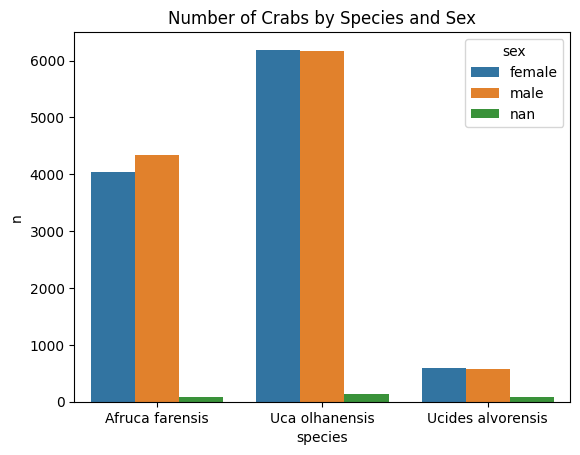

In [70]:
nr_crabs_by_sp_sex = df.groupby(['species', 'sex']).size().reset_index(name='n')

# Plotting
sns.barplot(data=nr_crabs_by_sp_sex, x='species', y='n', hue='sex')
plt.title('Number of Crabs by Species and Sex')
plt.show()

/tmp/ipykernel_27565/3162054238.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nr_crabs_by_sp_sex_stage = df.groupby(['species', 'sex', 'stage']).size().reset_index(name='n')


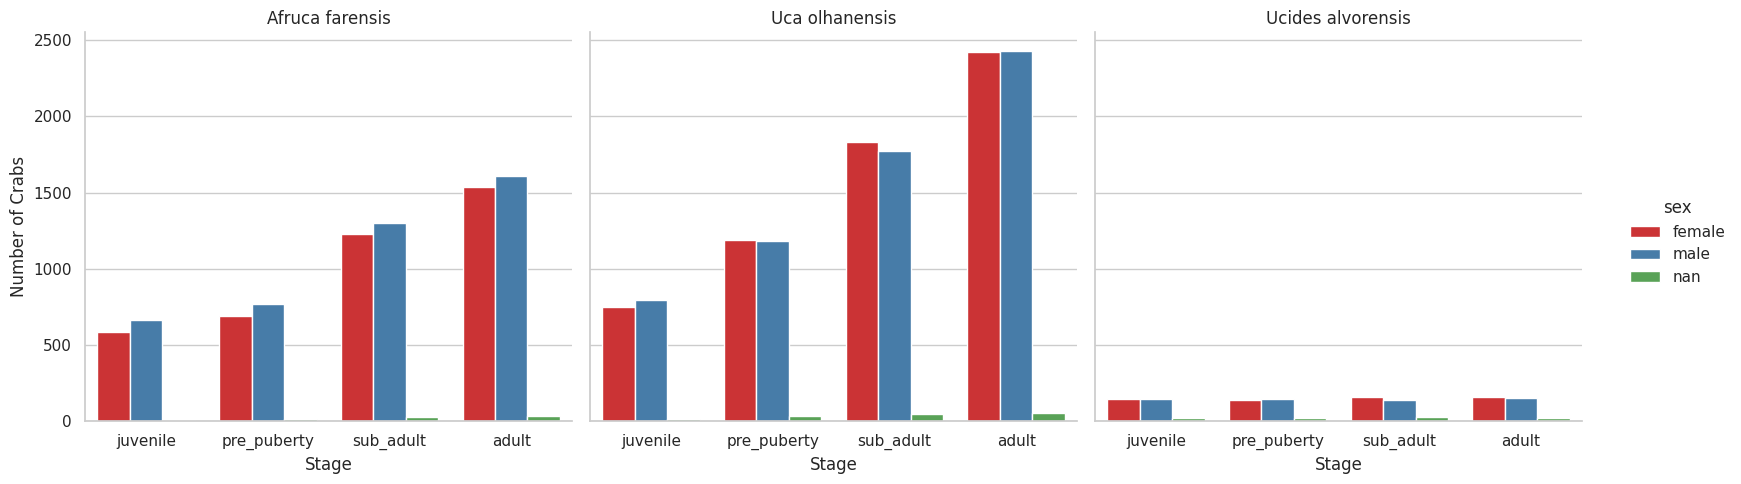

In [71]:
nr_crabs_by_sp_sex_stage = df.groupby(['species', 'sex', 'stage']).size().reset_index(name='n')

# Plotting with dodge equivalent
sns.set(style="whitegrid")
g = sns.catplot(
    data=nr_crabs_by_sp_sex_stage,
    kind="bar",
    x="stage",
    y="n",
    hue="sex",
    palette="Set1",
    col="species",
    col_wrap=3,
    dodge=True,
    height=5,
    aspect=1.
)
g.set_axis_labels("Stage", "Number of Crabs")
g.set_titles(col_template="{col_name}")
sns.move_legend(g, loc='center left', bbox_to_anchor=(1.01, 0.5))
plt.tight_layout()
plt.show()

/tmp/ipykernel_27565/3438188395.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nr_crabs_by_sp_sex_stage = df.groupby(['species', 'sex', 'stage']).size().reset_index(name='n')


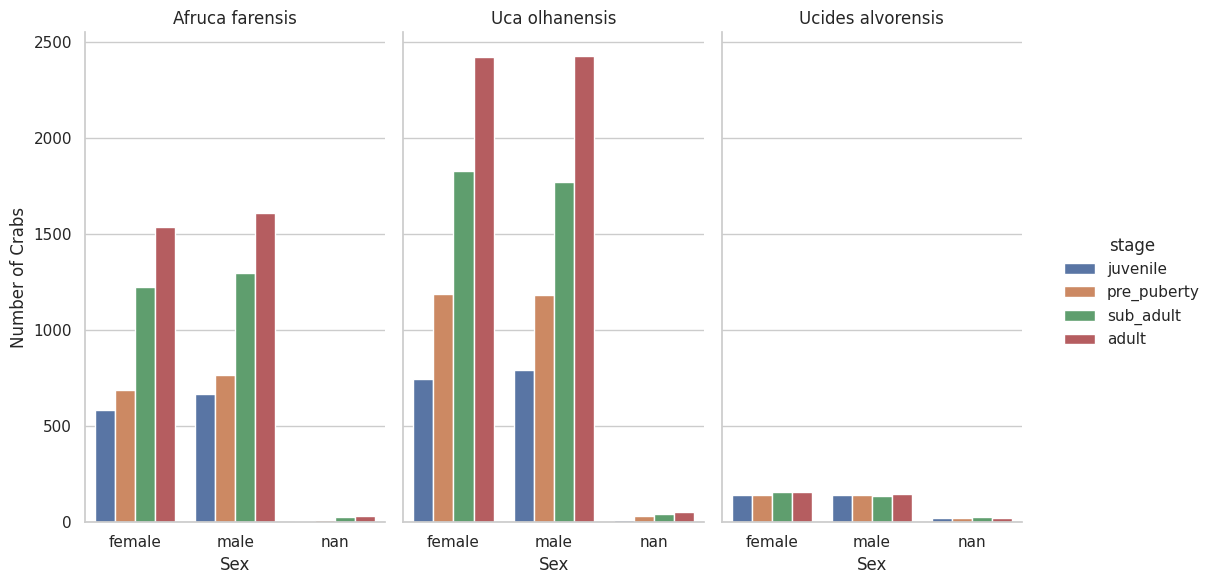

In [72]:
# Count the number of crabs by species, sex, and stage
nr_crabs_by_sp_sex_stage = df.groupby(['species', 'sex', 'stage']).size().reset_index(name='n')

# Plotting with dodge2-like positioning and facet_wrap
sns.set(style="whitegrid")
g = sns.catplot(
    data=nr_crabs_by_sp_sex_stage,
    kind="bar",
    x="sex",
    y="n",
    hue="stage",
    col="species",
    col_wrap=3,
    dodge=True,
    height=6,
    aspect=0.5
)
g.set_axis_labels("Sex", "Number of Crabs")
g.set_titles(col_template="{col_name}")
sns.move_legend(g, loc='center left', bbox_to_anchor=(1.01, 0.5))
plt.tight_layout()
plt.show()

/tmp/ipykernel_27565/209038599.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nr_crabs_by_sp_sex_stage = df.groupby(['species', 'sex', 'stage']).size().reset_index(name='n')
/tmp/ipykernel_27565/209038599.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nr_crabs_by_sp_sex_stage.groupby(['species'])['n']


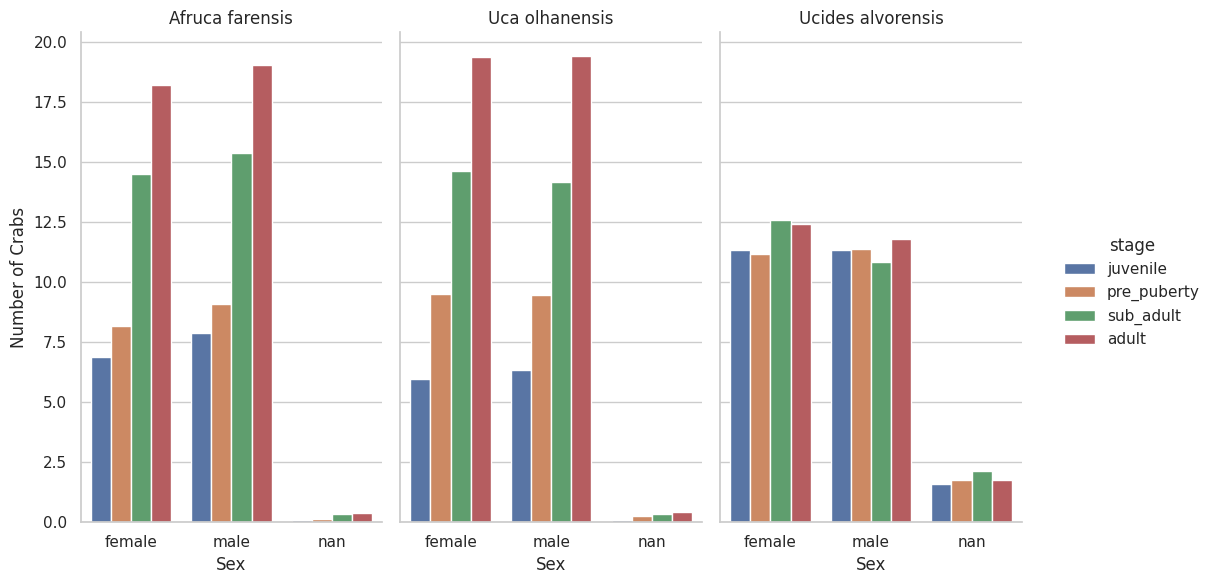

In [73]:
#@title Solution
# Count the number of crabs by species, sex, and stage
nr_crabs_by_sp_sex_stage = df.groupby(['species', 'sex', 'stage']).size().reset_index(name='n')

nr_crabs_by_sp_sex_stage['pct'] = (
    nr_crabs_by_sp_sex_stage.groupby(['species'])['n']
    .transform(lambda x: 100 * x / x.sum())
)

# Plotting with dodge2-like positioning and facet_wrap
sns.set(style="whitegrid")
g = sns.catplot(
    data=nr_crabs_by_sp_sex_stage,
    kind="bar",
    x="sex",
    y="pct",
    hue="stage",
    col="species",
    col_wrap=3,
    dodge=True,
    height=6,
    aspect=0.5
)
g.set_axis_labels("Sex", "Number of Crabs")
g.set_titles(col_template="{col_name}")
sns.move_legend(g, loc='center left', bbox_to_anchor=(1.01, 0.5))
plt.tight_layout()
plt.show()

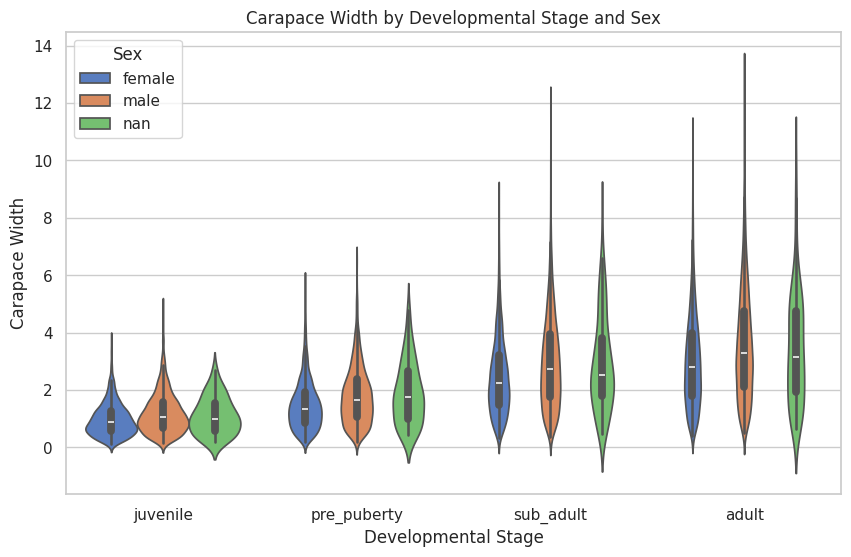

In [74]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='stage', y='carapace_width', hue='sex',
               # split=True,
               palette='muted')

# Customize the plot
plt.xlabel('Developmental Stage')
plt.ylabel('Carapace Width')
plt.title('Carapace Width by Developmental Stage and Sex')
plt.legend(title='Sex')
plt.show()

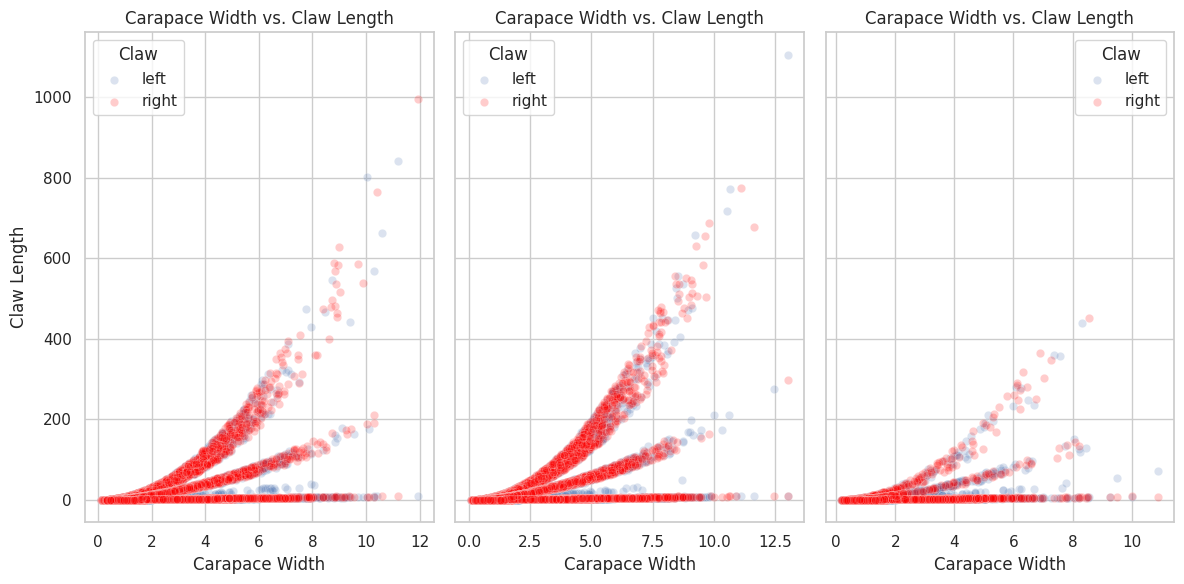

In [75]:
# Create three separate plots using matplotlib and seaborn
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True)

# Plot 1: carapace_width vs. left_claw_length
sns.scatterplot(data=df[df['species']=='Afruca farensis'],
                x='carapace_width', y='left_claw_length',
                alpha=0.2, ax=axes[0], label='left')
sns.scatterplot(data=df[df['species']=='Afruca farensis'],
                x='carapace_width', y='right_claw_length',
                alpha=0.2, ax=axes[0], color='red', label='right')

axes[0].set_title('Carapace Width vs. Claw Length')
axes[0].set_xlabel('Carapace Width')
axes[0].set_ylabel('Claw Length')
axes[0].legend(title='Claw')

# Plot 2: carapace_width vs. right_claw_length
sns.scatterplot(data=df[df['species']=='Uca olhanensis'],
                x='carapace_width', y='left_claw_length',
                alpha=0.2, ax=axes[1], label='left')
sns.scatterplot(data=df[df['species']=='Uca olhanensis'],
                x='carapace_width', y='right_claw_length',
                alpha=0.2, ax=axes[1], color='red', label='right')
axes[1].set_title('Carapace Width vs. Claw Length')
axes[1].set_xlabel('Carapace Width')
axes[1].set_ylabel('Claw Length')
axes[1].legend(title='Claw')

# Plot 2: carapace_width vs. right_claw_length
sns.scatterplot(data=df[df['species']=='Ucides alvorensis'],
                x='carapace_width', y='left_claw_length',
                alpha=0.2, ax=axes[2], label='left')
sns.scatterplot(data=df[df['species']=='Ucides alvorensis'],
                x='carapace_width', y='right_claw_length',
                alpha=0.2, ax=axes[2], color='red', label='right')
axes[2].set_title('Carapace Width vs. Claw Length')
axes[2].set_xlabel('Carapace Width')
axes[2].set_ylabel('Claw Length')
axes[2].legend(title='Claw')

# Adjust layout
plt.tight_layout()
plt.show()

In [76]:
species_by_time = df.groupby(['date', 'region', 'species']).size().unstack()
time_evolution = species_by_time.unstack()
agg = time_evolution.groupby(level=1, axis=1).sum()

/tmp/ipykernel_27565/347935261.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  species_by_time = df.groupby(['date', 'region', 'species']).size().unstack()
/tmp/ipykernel_27565/347935261.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  agg = time_evolution.groupby(level=1, axis=1).sum()
/tmp/ipykernel_27565/347935261.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = time_evolution.groupby(level=1, axis=1).sum()


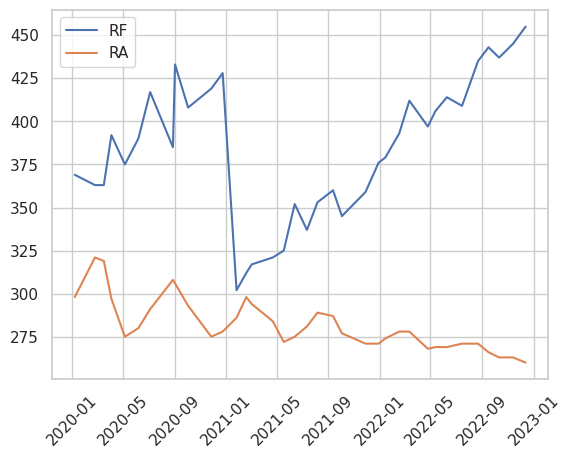

In [77]:
plt.plot(time_evolution.index, agg['Ria Formosa'], label='RF')
plt.plot(time_evolution.index, agg['Ria Alvor'], label='RA')
plt.xticks(rotation=45)
plt.legend()
plt.show()